Starting up OCR application...
Reading images from folder path: C:\Users\jeffd\Documents\WGU\C964\TestImages
Transcribing text from images...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Transcriptions complete!
Rendering charts...


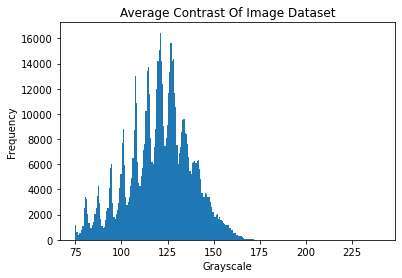

In [11]:
from PIL import Image
import pytesseract as t
from pytesseract import Output
import os
import time
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import numpy as np
import cv2 as cv

def main():
    print("Starting up OCR application...")
    
    #this specifies the environment path
    t.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
    
    # path for the raw images folder(input)
    path ="C:\\Users\\jeffd\\Documents\\WGU\\C964\\TestImages"
  
    # path for the transcribed text files(output)
    output_path ="C:\\Users\\jeffd\\Documents\\WGU\\C964\\TranscribedArticles"
    
    x_axis = []
    y_axis = []
    b = bucket(0,0,0,0,0)
      
    print("Reading images from folder path: " + path)
    print("Transcribing text from images...")
    
    # iterates over all images in the raw image folder and creates a progress bar
    for image_name in progressBar(os.listdir(path), prefix = 'Progress:', suffix = 'Complete', length = 50):
            
        # starts the duration timer
        start = time.time()
        
        transcribe_to_file(path, output_path, image_name)
        
        #stops the duration timer and then calculates the duration for a transcription
        stop = time.time()
        duration = stop-start
        
        #counts the number of words in a transcribed doc
        word_count = word_counter(output_path, image_name)
        
        #sorts data into buckets for the piechart to render
        b.word_bucket_sorter(word_count)
        
        x_axis.append(duration)
        y_axis.append(word_count)
        
        time.sleep(0.1)
    
    print("Transcriptions complete!")
    print("Rendering charts...")
    piechart(b.get_buckets())
    scatter(x_axis, y_axis)
    histogram(path)

def transcribe_to_file(input_folder_path, save_location, image_name):
    input_path = os.path.join(input_folder_path, image_name)
    img = Image.open(input_path)

    # executes the pytesseract on the image
    transcribed_text = t.image_to_string(img, lang ="eng")

    # removes the .jpg from the imagePath
    image_name_clipped = image_name[0:-4]

    full_output_path = os.path.join(save_location, image_name_clipped+".txt")

    # saving the text for every image in a separate .txt file
    f = open(full_output_path, "w")
    f.write(transcribed_text)
    f.close()

def piechart(arr):
    
    range_arr = arr
    labels = ['WordCount < 1000','WordCount 1000-1099','WordCount 1200-1299','WordCount 1300-1399','WordCount > 1400']
    values = range_arr
    fig1 = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig1.update_layout(
        title="Word Count Ranges"
    )
    fig1.show()

def word_counter(output_path, image_name):
    # removes the .jpg from the imagePath
    image_name_clipped = image_name[0:-4]
    full_output_path = os.path.join(output_path, image_name_clipped+".txt")
    file = open(full_output_path, "rt")
    data = file.read()
    words = data.split()
    return len(words)

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

def histogram(path):

    arr = []
  
    # iterates over all images in the raw image folder
    for imageName in os.listdir(path):
       
        input_path = os.path.join(path, imageName)

        img = cv.imread(input_path)
        ravel_img = img.ravel()
        arr.append(ravel_img[-1000000:])
        
    
    average_histo = np.mean( np.array(arr), axis=0 )
        
    plt.hist(average_histo, 256, [75, 240])
    plt.title("Average Contrast Of Image Dataset")
    plt.xlabel("Grayscale")
    plt.ylabel("Frequency")
    plt.show()

def scatter(x_data,y_data):
    fig2 = px.scatter( x=x_data, y=y_data, trendline='ols')
    fig2.update_layout(
        title="Average Time To Transcribe By Word Count",
        xaxis_title="Time to transcribe",
        yaxis_title="Word count of document"
    )
    fig2.show()

def progressBar(iterable, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    total = len(iterable)

    def printProgressBar (iteration):
        percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
        filledLength = int(length * iteration // total)
        bar = fill * filledLength + '-' * (length - filledLength)
        print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)

    printProgressBar(0)
    
    for i, item in enumerate(iterable):
        yield item
        printProgressBar(i + 1)

    print()
    
class bucket:
    def __init__(self, bucket1,bucket2,bucket3,bucket4,bucket5):
        self.bucket1 = bucket1
        self.bucket2 = bucket2
        self.bucket3 = bucket3
        self.bucket4 = bucket4
        self.bucket5 = bucket5
    
    def word_bucket_sorter(self, word_count):
    
        if word_count <= 1000:
            self.bucket1 += 1
        if 1000 < word_count <= 1099:
            self.bucket2 += 1
        if 1200 < word_count <= 1299:
            self.bucket3 += 1
        if 1300 < word_count <= 1399:
            self.bucket4 += 1
        if word_count > 1400:
            self.bucket5 += 1
        
    def get_buckets(self):
        arr = [ 
            self.bucket1, 
            self.bucket2,
            self.bucket3,
            self.bucket4,
            self.bucket5
        ]
        
        return arr
    
    
if __name__ == '__main__':
    main()